**1 - Importando os dados**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
base = pd.read_csv('/content/vgsales.csv')
base.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


**2 - Conhecendo e tratando os dados**

In [ ]:
base.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16324.000000,16324.000000,16324.000000,16324.000000,16324.000000,16324.000000,16324.000000
mean,8291.508270,2006.404251,0.265464,0.147581,0.078673,0.048334,0.540328
std,4792.043734,5.826744,0.821658,0.508809,0.311584,0.189902,1.565860
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4135.750000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8293.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.250000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
print(base.isna().sum())

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64


In [ ]:
base['Publisher'].fillna("NoInfo", inplace=True)

In [ ]:
base.drop(["Rank"], axis=1, inplace=True)
base.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


In [ ]:
base['Platform'].unique()

array(['2600', 'NES', 'PC', 'DS', 'GB', 'SNES', 'GEN', 'GG', 'SCD', 'NG',
       'PS', 'SAT', '3DO', 'TG16', 'N64', 'PCFX', 'DC', 'WS', 'PS2', 'XB',
       'GBA', 'GC', 'PSP', 'X360', 'Wii', 'PS3', '3DS', 'PSV', 'WiiU',
       'PS4', 'XOne'], dtype=object)

**3 - Identificando os grupos**

In [ ]:
bd = pd.get_dummies(base)
bd.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Name_'98 Koshien,Name_.hack//G.U. Vol.1//Rebirth,Name_.hack//G.U. Vol.2//Reminisce,Name_.hack//G.U. Vol.2//Reminisce (jp sales),...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
0,1980,4.00,0.26,0.0,0.05,4.31,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1980,2.56,0.17,0.0,0.03,2.76,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1980,1.07,0.07,0.0,0.01,1.15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1980,0.99,0.05,0.0,0.01,1.05,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1980,0.72,0.04,0.0,0.01,0.77,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Usando as variáveis dummies é possível passar o projeto para o algoritimo de ML

In [ ]:
x = bd.div( bd.sum(axis=1), axis='rows')
x.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Name_'98 Koshien,Name_.hack//G.U. Vol.1//Rebirth,Name_.hack//G.U. Vol.2//Reminisce,Name_.hack//G.U. Vol.2//Reminisce (jp sales),...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
0,0.993667,0.002007,0.000130,0.0,0.000025,0.002163,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.995215,0.001287,0.000085,0.0,0.000015,0.001387,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.996828,0.000539,0.000035,0.0,0.000005,0.000579,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.996929,0.000498,0.000025,0.0,0.000005,0.000529,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.997210,0.000363,0.000020,0.0,0.000005,0.000388,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.cluster import KMeans
distortions = []
n_clusters = range(3,8)
for n_clus in n_clusters:
  print(n_clus)
  distortions.append( KMeans(n_clusters=n_clus, max_iter=5000, n_init=1, random_state=215).fit(x).inertia_)

3
4
5
6
7


Este código acima, gerar o ML que vai simular diversas vezes algoritimos com 3 a 8 grupos, e vai repetir 5000x para encontrar o melhor desempenho

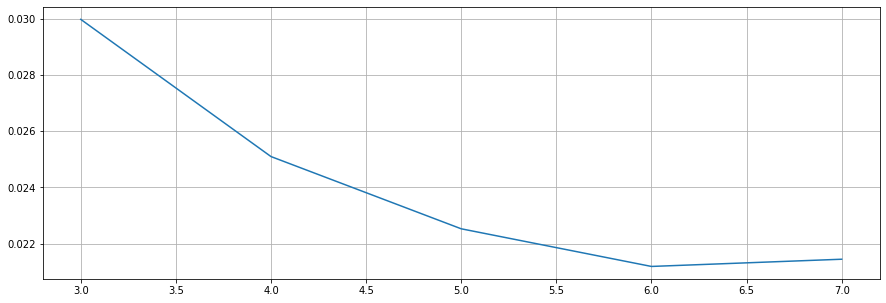

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(n_clusters, distortions)
plt.grid()

Este gráfico auxilia a identificar o número ideal de grupo, é possível identificar que o primeiro cotovelo relevante é para 4 grupos

In [ ]:
km = KMeans(n_clusters=4, max_iter=5000, n_init=1, random_state=215)
xt = km.fit_predict(x)
xt

array([2, 2, 0, ..., 0, 0, 0], dtype=int32)

Gera os grupos com o número adequado de cluster

In [ ]:
base.loc[:, 'Type'] = xt
base.loc[base.Type==1]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Type
108,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,1
122,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1
188,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,1
205,Super Mario World,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61,1
705,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1
1636,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,1
4408,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,1
5171,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76,1
5172,Mario Kart DS,DS,2005,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42,1
5173,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22,1


In [ ]:
base.to_csv('Games', index=False)

Importa o CSV com a coluna e número do grupo pertencente cada título

**Grupos encontrados após analise :**

0 - Diverso ( Engloba diversos micro perfis que não são possíveis de definir)

1 - Nintendista ( Consome somente produtos da nintendo, a maior parte deste,perfil é asiatico )

2 - Entusiasta ( Joga o que pode, e não possui/quer investir muito para se divertir )

3 - Gamer ( Joga os jogos mais populares, consome os produtos mais novos )